# non-spatial but time-varying coefficent model
This is an example to show how we estimate time-varying coefficient model with `DynamicESF`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import DynamicESF
from DynamicESF import HedonicModels

import time

print(f"{np.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{DynamicESF.__version__=}")

np.__version__='1.21.5'
matplotlib.__version__='3.5.1'
DynamicESF.__version__='0.1.0'


generate random walk sequences for coefficients beta

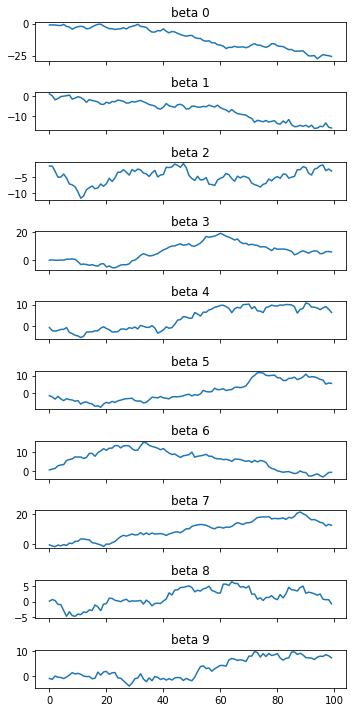

In [2]:
T = 100
D = 10
beta = np.cumsum(np.random.normal(size=(T,D)), axis=0)

fig, axes = plt.subplots(D, 1, sharex=True, figsize=(5, D*1))
for d in range(D):
    axes[d].set_title(f"beta {d}")
    axes[d].plot(range(T), beta[:,d])
fig.tight_layout()
fig.show()

generate exogenous variables $X$, and endogenous variables $y$ from coefficents generated above

In [3]:
def gen_data(N):
    X = np.random.normal(scale=2, size=(T,N,D))
    y = np.sum(beta[:,None] * X, axis=-1) + np.random.normal(scale=0.3, size=(T,N))

    return y, X

fit model

In [4]:
N = 10
y, X = gen_data(N)
maxiter = 1000

start = time.time()
model = HedonicModels.DynamicHedonic(y, X) # define model
model.fit(maxiter) # fit with EM algorithm
elpstm = time.time() - start
print(elpstm, "sec. for fitting")

Q=-1648.859:   8%|▊         | 85/1000 [00:06<01:13, 12.49it/s]

6.821749687194824 sec. for fitting


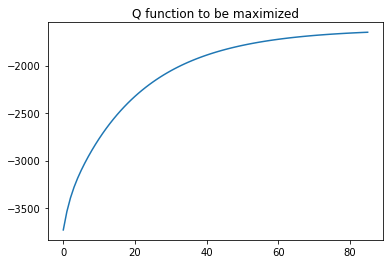

In [5]:
plt.title("Q function to be maximized")
plt.plot(model.DLM.Q)
plt.show()

compare true beta and estimated beta. They almost perfectly match!

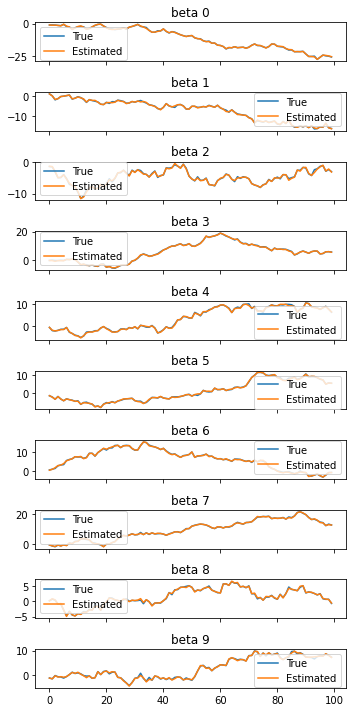

In [6]:
fig, axes = plt.subplots(D, 1, sharex=True, figsize=(5, D*1))
for d in range(D):
    axes[d].set_title(f"beta {d}")
    axes[d].plot(range(T), beta[:,d], label="True")
    axes[d].plot(range(T), model.beta[:,d], label="Estimated")
    axes[d].legend()
fig.tight_layout()
fig.show()

report computations times for various samplesize.

In [7]:
Ns = [1, 3, 5, 10, 20, 30, 40, 50, 100, 200]

elpstms = []
n_iter = []
for N in Ns:
    print(f"{N=}")
    y, X = gen_data(N)

    start = time.time()
    model = HedonicModels.DynamicHedonic(y, X)
    model.fit(maxiter)

    elpstms.append(time.time() - start)
    n_iter.append(len(model.DLM.Q))

N=1


Q=-1560.788:   4%|▍         | 39/1000 [00:01<00:48, 20.00it/s]


N=3


Q=-1879.335:   4%|▍         | 43/1000 [00:02<00:45, 20.97it/s]


N=5


Q=-1987.734:  10%|▉         | 97/1000 [00:04<00:41, 21.74it/s]


N=10


Q=-1795.785:   8%|▊         | 76/1000 [00:03<00:47, 19.61it/s]


N=20


Q=-1880.773:   2%|▏         | 15/1000 [00:01<01:27, 11.30it/s]


N=30


Q=-2074.393:   1%|          | 11/1000 [00:00<01:28, 11.19it/s]


N=40


Q=-2227.735:   1%|          | 11/1000 [00:01<01:37, 10.16it/s]


N=50


Q=-2559.644:   1%|          | 11/1000 [00:01<01:43,  9.51it/s]


N=100


Q=-3439.181:   1%|          | 11/1000 [00:01<02:31,  6.52it/s]


N=200


Q=-5613.659:   1%|          | 11/1000 [00:02<04:12,  3.92it/s]


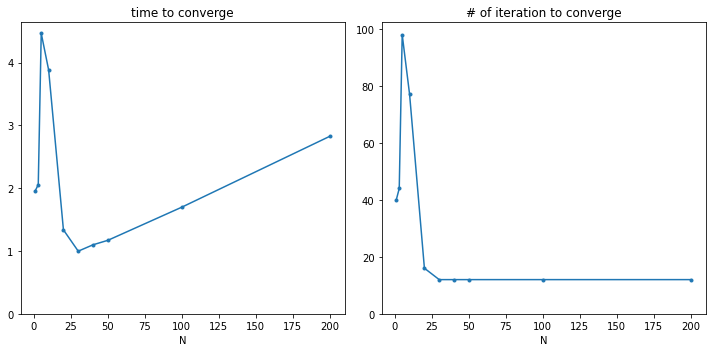

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_title("time to converge")
axes[0].plot(Ns, elpstms, marker=".")
axes[0].set_xlabel("N")
axes[0].set_ylim(0, None)
axes[1].set_title("# of iteration to converge")
axes[1].plot(Ns, n_iter, marker=".")
axes[1].set_xlabel("N")
axes[1].set_ylim(0, None)
fig.tight_layout()
fig.show()